In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
sensor_data = pd.read_csv('Sensor_Color_Distribution.csv')
sensor_data.head()

,dist,R,O,Y,G,B
0,0,0.30,0.00,0.00,0.0,0.0
1,1,0.27,0.01,0.00,0.0,0.0
2,2,0.21,0.03,0.00,0.0,0.0
3,3,0.13,0.08,0.00,0.0,0.0
4,4,0.06,0.15,0.01,0.0,0.0


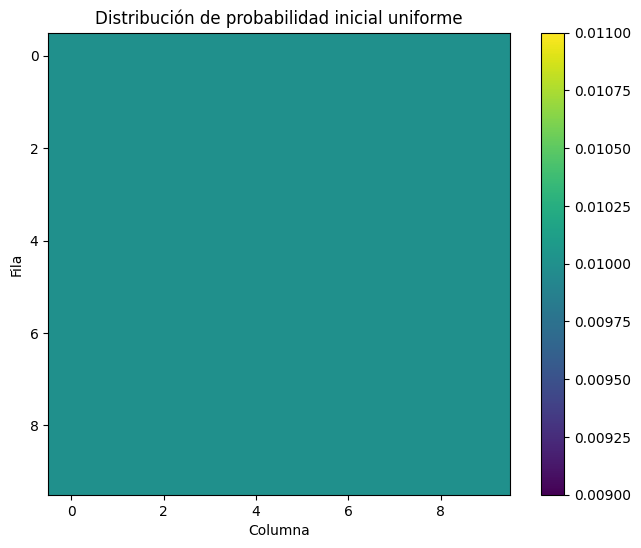

In [75]:
board_size = 10
prior = np.full((board_size, board_size), 1.0 / (board_size * board_size))

def plot_board(probabilities, title="Probabilidad del fantasma en cada celda"):
    fig, ax = plt.subplots(figsize=(8, 6))
    heatmap = ax.imshow(probabilities, cmap="viridis")
    ax.set_title(title)
    plt.colorbar(heatmap)
    ax.set_xlabel('Columna')
    ax.set_ylabel('Fila')
    plt.show()

plot_board(prior, "Distribución de probabilidad inicial uniforme")

In [76]:
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def update_probabilities(board, sensor_pos, color_detected, sensor_data):
    sensor_x, sensor_y = sensor_pos
    new_board = np.zeros_like(board)
    color_probabilities = sensor_data[color_detected].values
    
    for i in range(board_size):
        for j in range(board_size):
            distance = manhattan_distance(sensor_x, sensor_y, i, j)
            probability_color_given_ghost = color_probabilities[distance] if distance < len(color_probabilities) else 0.01
            new_board[i, j] = board[i, j] * probability_color_given_ghost
    
    if new_board.sum() > 0:
        new_board /= new_board.sum() 
    else:
        new_board.fill(1 / (board_size * board_size))

    return new_board

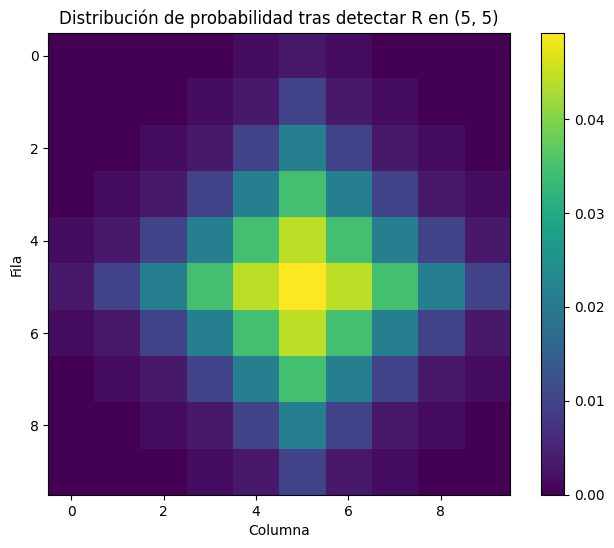

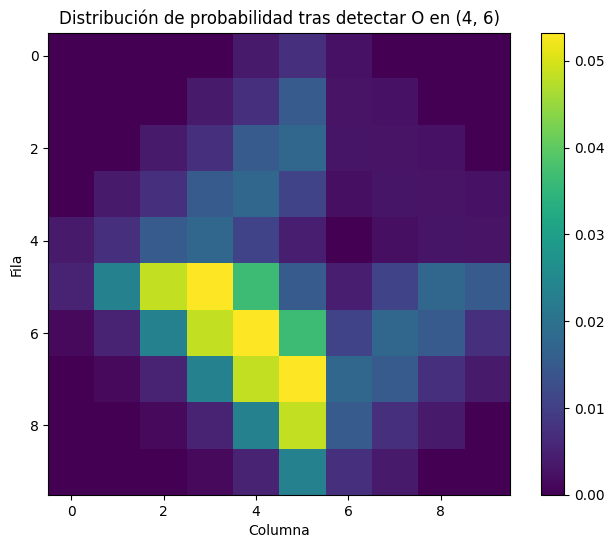

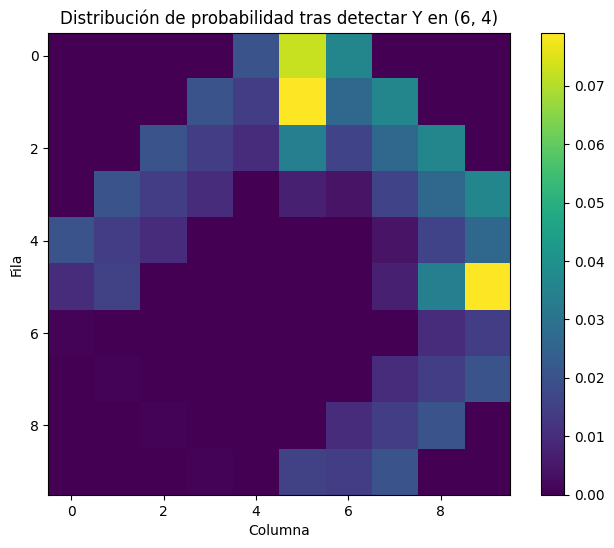

(1, 5) 0.07906874588183614


In [78]:

evidences = [((5, 5), 'R'), ((4, 6), 'O'), ((6, 4), 'Y')]

current_board = np.copy(prior)

def process_evidences(evidences, board):
    boards = []
    for pos, color in evidences:
        updated_board = update_probabilities(board, pos, color, sensor_data)
        boards.append((updated_board, pos, color))
        board = updated_board
    return boards

current_board = np.copy(prior)

processed_boards = process_evidences(evidences, current_board)

for board, pos, color in processed_boards:
    title = f"Distribución de probabilidad tras detectar {color} en {pos}"
    plot_board(board, title)

final_most_likely_position = np.unravel_index(np.argmax(processed_boards[-1][0]), processed_boards[-1][0].shape)
final_most_likely_probability = processed_boards[-1][0][final_most_likely_position]

print(final_most_likely_position, final_most_likely_probability)